In [1]:
import pandas as pd
import re

In [45]:
df=pd.read_table('https://github.com/prasertcbs/tutorial/raw/master/employee.tsv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      9 non-null      object 
 1   dob         8 non-null      object 
 2   occupation  10 non-null     object 
 3   work_exp    10 non-null     float64
 4   salary      8 non-null      float64
 5   own_house   10 non-null     bool   
 6   children    10 non-null     int64  
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 618.0+ bytes


In [29]:
df.occupation.value_counts()

nurse         2
teacher       2
dentist       1
accountant    1
engineer      1
developer     1
lawyer        1
police        1
Name: occupation, dtype: int64

In [30]:
df.occupation.unique()

array(['nurse', 'dentist', 'accountant', 'engineer', 'teacher',
       'developer', 'lawyer', 'police'], dtype=object)

In [31]:
df[['salary', 'work_exp']].mean()

salary      122612.50
work_exp         4.45
dtype: float64

In [32]:
df.occupation.str.capitalize()

0         Nurse
1       Dentist
2    Accountant
3      Engineer
4       Teacher
5     Developer
6         Nurse
7        Lawyer
8       Teacher
9        Police
Name: occupation, dtype: object

In [33]:
df.dob = pd.to_datetime(df.dob)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      9 non-null      object 
 1   dob         8 non-null      object 
 2   occupation  10 non-null     object 
 3   work_exp    10 non-null     float64
 4   salary      8 non-null      float64
 5   own_house   10 non-null     bool   
 6   children    10 non-null     int64  
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 618.0+ bytes


In [35]:
df.salary*0

0    0.0
1    0.0
2    NaN
3    0.0
4    0.0
5    NaN
6    0.0
7    0.0
8    0.0
9    0.0
Name: salary, dtype: float64

In [44]:
df.rename(columns={'salary':'A'}, inplace=True)
df

,gender,dob,occupation,work_exp,A,own_house,children
0,M,31-Jul-89,nurse,2.2,"223,700.0",True,1
1,NaN,30-Oct-92,dentist,6.7,"121,100.0",True,1
2,F,NaN,accountant,9.0,NaN,False,2
3,F,17-Sep-87,engineer,1.7,"79,900.0",False,0
4,M,24-Jan-93,teacher,3.6,"32,800.0",False,2
5,F,NaN,developer,1.8,NaN,True,1
6,F,26-Sep-94,nurse,5.6,"272,500.0",False,1
7,M,7-May-91,lawyer,4.1,"41,600.0",False,0
8,M,4-Dec-94,teacher,3.3,"141,300.0",True,0
9,M,10-Jul-87,police,6.5,"68,000.0",True,1


In [37]:
df.A = df.A.astype('object')

In [38]:
df.A = df.A.apply(lambda a: f'{a:,.0f}')

In [48]:
pd.set_option('display.float_format', '{:,}'.format)
pd.reset_option('display.float_format')

In [53]:
df

,gender,dob,occupation,work_exp,salary,own_house,children
0,M,31-Jul-89,nurse,2.2,223700.0,True,1
1,NaN,30-Oct-92,dentist,6.7,121100.0,True,1
2,F,NaN,accountant,9.0,NaN,False,2
3,F,17-Sep-87,engineer,1.7,79900.0,False,0
4,M,24-Jan-93,teacher,3.6,32800.0,False,2
5,F,NaN,developer,1.8,NaN,True,1
6,F,26-Sep-94,nurse,5.6,272500.0,False,1
7,M,7-May-91,lawyer,4.1,41600.0,False,0
8,M,4-Dec-94,teacher,3.3,141300.0,True,0
9,M,10-Jul-87,police,6.5,68000.0,True,1


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      9 non-null      object 
 1   dob         8 non-null      object 
 2   occupation  10 non-null     object 
 3   work_exp    10 non-null     float64
 4   salary      8 non-null      float64
 5   own_house   10 non-null     bool   
 6   children    10 non-null     int64  
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 618.0+ bytes


In [59]:
df.sort_values('occupation')

,gender,dob,occupation,work_exp,salary,own_house,children
2,F,NaN,accountant,9.0,NaN,False,2
1,NaN,30-Oct-92,dentist,6.7,121100.0,True,1
5,F,NaN,developer,1.8,NaN,True,1
3,F,17-Sep-87,engineer,1.7,79900.0,False,0
7,M,7-May-91,lawyer,4.1,41600.0,False,0
0,M,31-Jul-89,nurse,2.2,223700.0,True,1
6,F,26-Sep-94,nurse,5.6,272500.0,False,1
9,M,10-Jul-87,police,6.5,68000.0,True,1
4,M,24-Jan-93,teacher,3.6,32800.0,False,2
8,M,4-Dec-94,teacher,3.3,141300.0,True,0


In [64]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/mpg.csv')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [67]:
df.select_dtypes('number').drop(columns='year')

,displ,cyl,cty,hwy
0,1.8,4,18,29
1,1.8,4,21,29
2,2.0,4,20,31
3,2.0,4,21,30
4,2.8,6,16,26
...,...,...,...,...
229,2.0,4,19,28
230,2.0,4,21,29
231,2.8,6,16,26
232,2.8,6,18,26


In [70]:
df.head(2)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact


<AxesSubplot: xlabel='displ', ylabel='cty'>

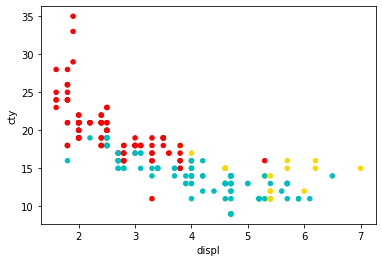

In [72]:
df.plot(kind='scatter', x='displ', y='cty', c = df.drv.map({'f':'red', '4':'c', 'r':'gold'}))

<AxesSubplot: >

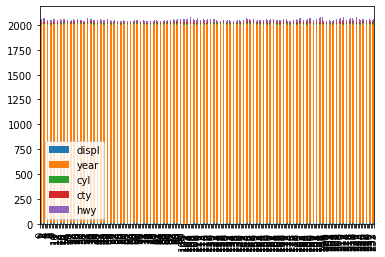

In [73]:
df.plot(kind='bar', stacked=True)

In [74]:
from matplotlib.ticker import FuncFormatter

In [91]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/oil_gold_setindex.csv',
                index_col='Date', parse_dates=True)
df.head(2)

,Oil,Gold,SET
Date,,,
2003-01-31,30.71,356.859,370.01
2003-02-28,32.63,358.970,361.32


In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

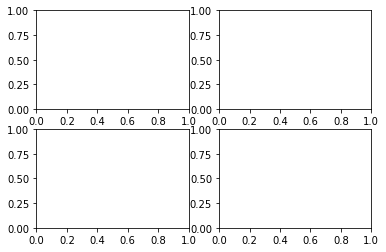

In [93]:
fig, ax = plt.subplots(2,2)

In [94]:
df.columns

Index(['Oil', 'Gold', 'SET'], dtype='object')

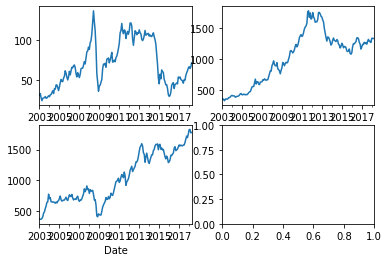

In [96]:
fig, ax = plt.subplots(2,2)

ax = ax.ravel()

for i, v in enumerate(['Oil', 'Gold', 'SET']):
    df[v].plot(kind='line', ax=ax[i])

In [98]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=[1,2,3,4,5])
df.head()

,1,2,3,4,5
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [101]:
df=pd.read_table('https://github.com/prasertcbs/tutorial/raw/master/datetime.tsv', parse_dates=['date_stamp','date_stamp2'])
df.head(2)

,date_stamp,date_stamp2,date_stamp3,iso_date,fmt1,fmt2,ym,ymd,ymdhm,tm,y,m,d,gender,menu,price,member
0,2016-11-28,2016-11-28,11/28/16,2016-11-28,28-Nov-2016,"Nov 28, 2016",2016-11,20161128,201611282313,6:28 PM,2016,11,28,F,water,38,True
1,2016-07-08,2016-07-08,8/7/16,2016-08-07,07-Aug-2016,"Aug 7, 2016",2016-08,20160807,201608071555,9:51 AM,2016,8,7,M,water,48,True


In [102]:
df.date_stamp3 = pd.to_datetime(df.date_stamp3)

In [109]:
df.fmt2 = pd.to_datetime(df.fmt2, format='%b %d, %Y')

In [110]:
df

,date_stamp,date_stamp2,date_stamp3,iso_date,fmt1,fmt2,ym,ymd,ymdhm,tm,y,m,d,gender,menu,price,member
0,2016-11-28,2016-11-28,2016-11-28,2016-11-28,2016-11-28,2016-11-28,2016-11,20161128,201611282313,6:28 PM,2016,11,28,F,water,38,True
1,2016-07-08,2016-07-08,2016-08-07,2016-08-07,2016-08-07,2016-08-07,2016-08,20160807,201608071555,9:51 AM,2016,8,7,M,water,48,True
2,2016-10-06,2016-10-06,2016-06-10,2016-06-10,2016-06-10,2016-06-10,2016-06,20160610,201606100707,11:52 AM,2016,6,10,M,water,45,False
3,2016-03-26,2016-03-26,2016-03-26,2016-03-26,2016-03-26,2016-03-26,2016-03,20160326,201603261013,5:54 AM,2016,3,26,F,water,41,False
4,2017-07-26,2017-07-26,2017-07-26,2017-07-26,2017-07-26,2017-07-26,2017-07,20170726,201707260705,1:40 AM,2017,7,26,F,tea,33,True
5,2015-05-20,2015-05-20,2015-05-20,2015-05-20,2015-05-20,2015-05-20,2015-05,20150520,201505201154,2:09 AM,2015,5,20,M,pepsi,50,True
6,2016-10-08,2016-10-08,2016-08-10,2016-08-10,2016-08-10,2016-08-10,2016-08,20160810,201608102129,10:49 AM,2016,8,10,M,water,48,True
7,2015-02-18,2015-02-18,2015-02-18,2015-02-18,2015-02-18,2015-02-18,2015-02,20150218,201502182201,2:03 AM,2015,2,18,F,pepsi,40,False
8,2016-06-02,2016-06-02,2016-02-06,2016-02-06,2016-02-06,2016-02-06,2016-02,20160206,201602062333,4:54 PM,2016,2,6,M,coke,36,False
9,2015-04-08,2015-04-08,2015-08-04,2015-08-04,2015-08-04,2015-08-04,2015-08,20150804,201508040100,8:16 AM,2015,8,4,M,juice,35,False


In [111]:
bbl = pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/eod/bbl.csv', 
                  parse_dates=True, index_col='Date')
bbl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-01,174.5,175.5,173.5,175.5,169.355362,5953500.0
2017-02-02,175.0,177.0,174.5,175.5,169.355362,5250500.0
2017-02-03,175.0,178.5,175.0,178.5,172.250336,5470600.0
2017-02-06,178.5,181.5,178.5,180.5,174.180313,8150800.0
2017-02-07,180.5,181.0,179.0,180.0,173.697815,3648600.0
2017-02-08,180.0,180.0,178.5,179.0,172.732819,2574200.0
2017-02-09,179.5,182.5,179.5,181.0,174.662796,7290700.0
2017-02-10,182.0,182.5,181.0,182.5,176.110275,3589100.0
2017-02-13,182.5,182.5,182.5,182.5,176.110275,0.0


In [114]:
df = pd.concat([bbl, bbl,bbl], keys=[1,2,3], names=['A', 'B'])

In [115]:
df

Open   High    Low  Close   Adj Close     Volume
A B                                                            
1 2017-02-01  174.5  175.5  173.5  175.5  169.355362  5953500.0
  2017-02-02  175.0  177.0  174.5  175.5  169.355362  5250500.0
  2017-02-03  175.0  178.5  175.0  178.5  172.250336  5470600.0
  2017-02-06  178.5  181.5  178.5  180.5  174.180313  8150800.0
  2017-02-07  180.5  181.0  179.0  180.0  173.697815  3648600.0
  2017-02-08  180.0  180.0  178.5  179.0  172.732819  2574200.0
  2017-02-09  179.5  182.5  179.5  181.0  174.662796  7290700.0
  2017-02-10  182.0  182.5  181.0  182.5  176.110275  3589100.0
  2017-02-13  182.5  182.5  182.5  182.5  176.110275        0.0
  2017-02-14  182.0  182.5  179.0  179.0  172.732819  2841700.0
2 2017-02-01  174.5  175.5  173.5  175.5  169.355362  5953500.0
  2017-02-02  175.0  177.0  174.5  175.5  169.355362  5250500.0
  2017-02-03  175.0  178.5  175.0  178.5  172.250336  5470600.0
  2017-02-06  178.5  181.5  178.5  180.5  174.180313  8150800.0
  2017-02-07  180.5  181.0  179.0  180.0  173.697815  3648600.0
  2017-02-08  180.0  180.0  178.5  179.0  172.732819  2574200.0
  2017-02-09  179.5  182.5  179.5  181.0  174.662796  7290700.0
  2017-02-10  182.0  182.5  181.0  182.5  176.110275  3589100.0
  2017-02-13  182.5  182.5  182.5  182.5  176.110275        0.0
  2017-02-14  182.0  182.5  179.0  179.0  172.732819  2841700.0
3 2017-02-01  174.5  175.5  173.5  175.5  169.355362  5953500.0
  2017-02-02  175.0  177.0  174.5  175.5  169.355362  5250500.0
  2017-02-03  175.0  178.5  175.0  178.5  172.250336  5470600.0
  2017-02-06  178.5  181.5  178.5  180.5  174.180313  8150800.0
  2017-02-07  180.5  181.0  179.0  180.0  173.697815  3648600.0
  2017-02-08  180.0  180.0  178.5  179.0  172.732819  2574200.0
  2017-02-09  179.5  182.5  179.5  181.0  174.662796  7290700.0
  2017-02-10  182.0  182.5  181.0  182.5  176.110275  3589100.0
  2017-02-13  182.5  182.5  182.5  182.5  176.110275        0.0
  2017-02-14  182.0  182.5  179.0  179.0  172.732819  2841700.0

In [127]:
url='https://github.com/prasertcbs/basic-dataset/blob/master/PisaScore2015.xlsx?raw=true'
math = pd.read_excel(url, sheet_name='math')
sci = pd.read_excel(url, sheet_name='sci')

In [128]:
math 

,Rank,Country,Maths
0,1,Singapore,564
1,2,Hong Kong,548
2,3,Macau,544
3,4,Taiwan,542
4,5,Japan,532
...,...,...,...
65,68,Macedonia,371
66,69,Tunisia,367
67,70,Kosovo,362
68,71,Algeria,360


In [129]:
df = pd.merge(math[['Country', 'Maths']], sci[['Country','Science']], on='Country')

In [134]:
df['RAK'] = df.Maths.rank(ascending=False, method='first').astype('int')
df

,Country,Maths,Science,RAK
0,Singapore,564,556,1
1,Hong Kong,548,523,2
2,Macau,544,529,3
3,Taiwan,542,532,4
4,Japan,532,538,5
...,...,...,...,...
65,Macedonia,371,384,66
66,Tunisia,367,386,67
67,Kosovo,362,378,68
68,Algeria,360,376,69


In [135]:
df = pd.read_table('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/gapminder.tsv').set_index(['country', 'year'])
df

continent  lifeExp       pop   gdpPercap
country     year                                         
Afghanistan 1952      Asia   28.801   8425333  779.445314
            1957      Asia   30.332   9240934  820.853030
            1962      Asia   31.997  10267083  853.100710
            1967      Asia   34.020  11537966  836.197138
            1972      Asia   36.088  13079460  739.981106
...                    ...      ...       ...         ...
Zimbabwe    1987    Africa   62.351   9216418  706.157306
            1992    Africa   60.377  10704340  693.420786
            1997    Africa   46.809  11404948  792.449960
            2002    Africa   39.989  11926563  672.038623
            2007    Africa   43.487  12311143  469.709298

[1704 rows x 4 columns]

In [140]:
df.loc[pd.IndexSlice['A':'B',1952],:]

,,continent,lifeExp,pop,gdpPercap
country,year,,,,
Afghanistan,1952,Asia,28.801,8425333,779.445314
Albania,1952,Europe,55.230,1282697,1601.056136
Algeria,1952,Africa,43.077,9279525,2449.008185
Angola,1952,Africa,30.015,4232095,3520.610273
Argentina,1952,Americas,62.485,17876956,5911.315053
Australia,1952,Oceania,69.120,8691212,10039.595640
Austria,1952,Europe,66.800,6927772,6137.076492


In [143]:
df.index.get_level_values(0).str.contains('Thai')

array([False, False, False, ..., False, False, False])

In [144]:
df.loc[pd.IndexSlice[df.index.get_level_values(0).str.contains('Thai'),1952],:]

,,continent,lifeExp,pop,gdpPercap
country,year,,,,
Thailand,1952,Asia,50.848,21289402,757.797418


In [146]:
df = pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/score.csv', nrows=5)
df

,studentID,gender,math1,math2,math3,eng1,eng2,eng3,sci1,sci2,sci3
0,1,M,6,8,9,4,11,12,5,19,9
1,2,M,5,8,8,10,15,9,15,18,20
2,3,M,9,8,10,14,8,13,6,10,14
3,4,F,10,9,7,4,8,13,20,8,15
4,5,F,5,10,6,13,10,14,8,12,16


In [147]:
df.columns.str.match('[m]')

array([False, False,  True,  True,  True, False, False, False, False,
       False, False])

In [160]:
df[df.columns[df.columns.str.contains('2|3')]]

,math2,math3,eng2,eng3,sci2,sci3
0,8,9,11,12,19,9
1,8,8,15,9,18,20
2,8,10,8,13,10,14
3,9,7,8,13,8,15
4,10,6,10,14,12,16


In [163]:
df[df.columns[df.columns.str.match('.*\d$')]]

,math1,math2,math3,eng1,eng2,eng3,sci1,sci2,sci3
0,6,8,9,4,11,12,5,19,9
1,5,8,8,10,15,9,15,18,20
2,9,8,10,14,8,13,6,10,14
3,10,9,7,4,8,13,20,8,15
4,5,10,6,13,10,14,8,12,16


In [164]:
df=pd.read_table('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/BaskinRobbins.tsv',
                nrows=5)
df

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Sugar Alcohol (g)
0,Bananas Foster,160,8,0.2,20,16,2,NaN
1,Baseball Nut,160,9,0.2,19,13,3,NaN
2,Beavertails Pastry,170,9,0.3,21,15,3,NaN
3,Blackberry Frozen Yogurt,120,4,0.1,17,16,3,NaN
4,Blue Raspberry Sherbet,130,2,0.1,26,20,2,NaN


In [166]:
df.columns = df.columns.str.replace(' ', '__')
df

,Flavour,Calories,Total__Fat__(g),Trans__Fat__(g),Carbohydrates__(g),Sugars__(g),Protein__(g),Sugar__Alcohol__(g)
0,Bananas Foster,160,8,0.2,20,16,2,NaN
1,Baseball Nut,160,9,0.2,19,13,3,NaN
2,Beavertails Pastry,170,9,0.3,21,15,3,NaN
3,Blackberry Frozen Yogurt,120,4,0.1,17,16,3,NaN
4,Blue Raspberry Sherbet,130,2,0.1,26,20,2,NaN


In [167]:
df.columns = df.columns.str.replace('\(.*\)', '')
df

C:\Users\Acer\AppData\Local\Temp\ipykernel_288\3375330086.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('\(.*\)', '')


,Flavour,Calories,Total__Fat__,Trans__Fat__,Carbohydrates__,Sugars__,Protein__,Sugar__Alcohol__
0,Bananas Foster,160,8,0.2,20,16,2,NaN
1,Baseball Nut,160,9,0.2,19,13,3,NaN
2,Beavertails Pastry,170,9,0.3,21,15,3,NaN
3,Blackberry Frozen Yogurt,120,4,0.1,17,16,3,NaN
4,Blue Raspberry Sherbet,130,2,0.1,26,20,2,NaN


In [170]:
df.columns = df.columns.str.capitalize()
df

,Flavour,Calories,Total__fat__,Trans__fat__,Carbohydrates__,Sugars__,Protein__,Sugar__alcohol__
0,Bananas Foster,160,8,0.2,20,16,2,NaN
1,Baseball Nut,160,9,0.2,19,13,3,NaN
2,Beavertails Pastry,170,9,0.3,21,15,3,NaN
3,Blackberry Frozen Yogurt,120,4,0.1,17,16,3,NaN
4,Blue Raspberry Sherbet,130,2,0.1,26,20,2,NaN


In [174]:
df.sort_values(by=['Total__fat__','Trans__fat__'], ascending=[False, True])

,Flavour,Calories,Total__fat__,Trans__fat__,Carbohydrates__,Sugars__,Protein__,Sugar__alcohol__
1,Baseball Nut,160,9,0.2,19,13,3,NaN
2,Beavertails Pastry,170,9,0.3,21,15,3,NaN
0,Bananas Foster,160,8,0.2,20,16,2,NaN
3,Blackberry Frozen Yogurt,120,4,0.1,17,16,3,NaN
4,Blue Raspberry Sherbet,130,2,0.1,26,20,2,NaN


In [175]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/mtcars.csv', 
               index_col='model', nrows=10)
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [182]:
df.index.str.contains('Maz')

array([ True,  True, False, False, False, False, False, False, False,
       False])

In [181]:
df.columns.str.contains('M',case=False)

array([ True, False, False, False, False, False, False, False,  True,
       False, False])

In [180]:
df.loc[df.index.str.contains('Maz'), df.columns.str.contains('M',case=False)]

,mpg,am
model,,
Mazda RX4,21.0,1
Mazda RX4 Wag,21.0,1


In [186]:
df.loc[df.index.str.contains('Maz'), df.columns[df.columns.str.contains('M',case=False)]]

,mpg,am
model,,
Mazda RX4,21.0,1
Mazda RX4 Wag,21.0,1


In [187]:
url='https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
df=pd.read_csv(url)
df.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
226,volkswagen,new beetle,2.5,2008,5,auto(s6),f,20,29,r,subcompact
23,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater
57,dodge,durango 4wd,3.9,1999,6,auto(l4),4,13,17,r,suv
11,audi,a4 quattro,2.8,1999,6,auto(l5),4,15,25,p,compact
161,subaru,forester awd,2.5,2008,4,manual(m5),4,20,27,r,suv


In [190]:
df[df.manufacturer == 'audi']

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [195]:
df[(df.manufacturer == 'audi') & (df.drv == 'f') & (df.cty > 20)]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact


In [198]:
df[df.manufacturer.isin(['audi','honda'])]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [199]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/mpg30.csv'
df=pd.read_csv(url)
df.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
1,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
2,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv


In [201]:
df.query('20<cty<60 and drv == "f"')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
16,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact
17,honda,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact


In [205]:
df.query('manufacturer.str.contains("a") and drv =="4"')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
20,land rover,range rover,4.4,2008,8,auto(s6),4,12,18,r,suv
21,nissan,pathfinder 4wd,4.0,2008,6,auto(l5),4,14,20,p,suv
23,subaru,forester awd,2.5,1999,4,manual(m5),4,18,25,r,suv
24,subaru,impreza awd,2.2,1999,4,auto(l4),4,21,26,r,subcompact
25,subaru,forester awd,2.5,1999,4,auto(l4),4,18,24,r,suv
26,toyota,toyota tacoma 4wd,3.4,1999,6,manual(m5),4,15,17,r,pickup
27,toyota,4runner 4wd,2.7,1999,4,manual(m5),4,15,20,r,suv


In [208]:
df.query('manufacturer.str.match("[a-f]")')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
1,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
2,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv
3,chevrolet,malibu,3.1,1999,6,auto(l4),f,18,26,r,midsize
4,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
5,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
6,dodge,dakota pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup
7,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,17,24,r,minivan
8,dodge,caravan 2wd,3.8,1999,6,auto(l4),f,15,22,r,minivan
9,dodge,durango 4wd,4.7,2008,8,auto(l5),4,13,17,r,suv


In [210]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/msleep.csv', nrows=10)
df.isnull()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,False,False,False,False,False,False,True,True,False,True,False
1,False,False,False,False,True,False,False,True,False,False,False
2,False,False,False,False,False,False,False,True,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,True,False
7,False,False,True,False,True,False,True,True,False,True,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,True,True,False,False,False


In [280]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/msleep.csv', nrows=10)
df

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
5,Three-toed sloth,Bradypus,herbi,Pilosa,NaN,14.4,2.2,0.766667,9.6,NaN,3.850
6,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.7,1.4,0.383333,15.3,NaN,20.490
7,Vesper mouse,Calomys,NaN,Rodentia,NaN,7.0,NaN,NaN,17.0,NaN,0.045
8,Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.07000,14.000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0,NaN,NaN,21.0,0.09820,14.800


In [282]:
df.dropna(subset=['vore','conservation','sleep_cycle'], thresh=2)

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
5,Three-toed sloth,Bradypus,herbi,Pilosa,NaN,14.4,2.2,0.766667,9.6,NaN,3.850
6,Northern fur seal,Callorhinus,carni,Carnivora,vu,8.7,1.4,0.383333,15.3,NaN,20.490
8,Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.07000,14.000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0,NaN,NaN,21.0,0.09820,14.800


In [211]:
df.isnull().sum()

name            0
genus           0
vore            1
order           0
conservation    3
sleep_total     0
sleep_rem       3
sleep_cycle     5
awake           0
brainwt         5
bodywt          0
dtype: int64

In [212]:
df.notna().sum()

name            10
genus           10
vore             9
order           10
conservation     7
sleep_total     10
sleep_rem        7
sleep_cycle      5
awake           10
brainwt          5
bodywt          10
dtype: int64

In [213]:
url = 'https://github.com/prasertcbs/basic-dataset/raw/master/gapminder.csv'
df = pd.read_csv(url, index_col=['country', 'year'])
df.head()

continent  lifeExp       pop   gdpPercap
country     year                                         
Afghanistan 1952      Asia   28.801   8425333  779.445314
            1957      Asia   30.332   9240934  820.853030
            1962      Asia   31.997  10267083  853.100710
            1967      Asia   34.020  11537966  836.197138
            1972      Asia   36.088  13079460  739.981106

In [214]:
df.loc[pd.IndexSlice['Thailand', :],:]

continent  lifeExp       pop    gdpPercap
country  year                                          
Thailand 1952      Asia   50.848  21289402   757.797418
         1957      Asia   53.630  25041917   793.577415
         1962      Asia   56.061  29263397  1002.199172
         1967      Asia   58.285  34024249  1295.460660
         1972      Asia   60.405  39276153  1524.358936
         1977      Asia   62.494  44148285  1961.224635
         1982      Asia   64.597  48827160  2393.219781
         1987      Asia   66.084  52910342  2982.653773
         1992      Asia   67.298  56667095  4616.896545
         1997      Asia   67.521  60216677  5852.625497
         2002      Asia   68.564  62806748  5913.187529
         2007      Asia   70.616  65068149  7458.396327

In [215]:
df.loc[pd.IndexSlice[df.index.get_level_values(0).str.contains('Tha'), :],:]

continent  lifeExp       pop    gdpPercap
country  year                                          
Thailand 1952      Asia   50.848  21289402   757.797418
         1957      Asia   53.630  25041917   793.577415
         1962      Asia   56.061  29263397  1002.199172
         1967      Asia   58.285  34024249  1295.460660
         1972      Asia   60.405  39276153  1524.358936
         1977      Asia   62.494  44148285  1961.224635
         1982      Asia   64.597  48827160  2393.219781
         1987      Asia   66.084  52910342  2982.653773
         1992      Asia   67.298  56667095  4616.896545
         1997      Asia   67.521  60216677  5852.625497
         2002      Asia   68.564  62806748  5913.187529
         2007      Asia   70.616  65068149  7458.396327

In [217]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/mpg.csv')
df.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [219]:
g = df.groupby(['class'])

In [221]:
g.apply(lambda s:s.nlargest(2, 'hwy'))

manufacturer              model  displ  year  cyl       trans  \
class                                                                          
2seater    23     chevrolet           corvette    5.7  1999    8  manual(m6)   
           25     chevrolet           corvette    6.2  2008    8  manual(m6)   
compact    212   volkswagen              jetta    1.9  1999    4  manual(m5)   
           196       toyota            corolla    1.8  2008    4  manual(m5)   
midsize    144       nissan             altima    2.5  2008    4  manual(m6)   
           111      hyundai             sonata    2.4  2008    4  manual(m5)   
minivan    37         dodge        caravan 2wd    2.4  1999    4    auto(l3)   
           38         dodge        caravan 2wd    3.0  1999    6    auto(l4)   
pickup     202       toyota  toyota tacoma 4wd    2.7  2008    4  manual(m5)   
           200       toyota  toyota tacoma 4wd    2.7  1999    4  manual(m5)   
subcompact 221   volkswagen         new beetle    1.9  1999    4  manual(m5)   
           222   volkswagen         new beetle    1.9  1999    4    auto(l4)   
suv        161       subaru       forester awd    2.5  2008    4  manual(m5)   
           163       subaru       forester awd    2.5  2008    4    auto(l4)   

               drv  cty  hwy fl       class  
class                                        
2seater    23    r   16   26  p     2seater  
           25    r   16   26  p     2seater  
compact    212   f   33   44  d     compact  
           196   f   28   37  r     compact  
midsize    144   f   23   32  r     midsize  
           111   f   21   31  r     midsize  
minivan    37    f   18   24  r     minivan  
           38    f   17   24  r     minivan  
pickup     202   4   17   22  r      pickup  
           200   4   15   20  r      pickup  
subcompact 221   f   35   44  d  subcompact  
           222   f   29   41  d  subcompact  
suv        161   4   20   27  r         suv  
           163   4   20   26  r         suv

In [223]:
g.mean()

C:\Users\Acer\AppData\Local\Temp\ipykernel_288\2978112660.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g.mean()


,displ,year,cyl,cty,hwy
class,,,,,
2seater,6.160000,2004.400000,8.000000,15.400000,24.800000
compact,2.325532,2003.212766,4.595745,20.127660,28.297872
midsize,2.921951,2003.609756,5.317073,18.756098,27.292683
minivan,3.390909,2003.090909,5.818182,15.818182,22.363636
pickup,4.418182,2003.636364,7.030303,13.000000,16.878788
subcompact,2.660000,2003.114286,5.028571,20.371429,28.142857
suv,4.456452,2003.790323,6.967742,13.500000,18.129032


In [225]:
g.groups

{'2seater': [23, 24, 25, 26, 27], 'compact': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 141, 142, 169, 170, 171, 172, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220], 'midsize': [15, 16, 17, 32, 33, 34, 35, 36, 108, 109, 110, 111, 112, 113, 114, 143, 144, 145, 146, 147, 148, 149, 154, 155, 156, 157, 158, 179, 180, 181, 182, 183, 184, 185, 227, 228, 229, 230, 231, 232, 233], 'minivan': [37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], 'pickup': [48, 49, 50, 51, 52, 53, 54, 55, 56, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 83, 84, 85, 86, 87, 88, 89, 200, 201, 202, 203, 204, 205, 206], 'subcompact': [90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 115, 116, 117, 118, 119, 120, 121, 165, 166, 167, 168, 221, 222, 223, 224, 225, 226], 'suv': [18, 19, 20, 21, 22, 28, 29, 30, 31, 57, 58, 59, 60, 61, 62, 63, 74, 75, 76, 77, 78, 79, 80, 81, 82, 122, 123, 124, 125, 126, 127, 128, 1

In [226]:
g.get_group('2seater')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
23,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater
24,chevrolet,corvette,5.7,1999,8,auto(l4),r,15,23,p,2seater
25,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater
26,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater
27,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater


In [229]:
df.trans = df.trans.str.replace('\(.*\)', '')
df

C:\Users\Acer\AppData\Local\Temp\ipykernel_288\4265862565.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.trans = df.trans.str.replace('\(.*\)', '')


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto,f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual,f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto,f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual,f,18,26,p,midsize


In [250]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/FIFA2018/PlayerPersonalData.csv'
df = pd.read_csv(url).set_index('ID').drop(columns=['Photo', 'Flag', 'Club Logo', 'Unnamed: 0.1', 'Unnamed: 0'])
df.head(2)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special
ID,,,,,,,,,
20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228
158023,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154


In [251]:
def s(x):
    x = x.upper()
    if x[-1] == 'M':
        xx = 1e6
    elif x[-1] == 'K':
        xx = 1000
    else:
        xx = 1
    num = float(re.sub('[^\d.]','',x))
    return xx*num

In [253]:
df[['Value', 'Wage']].applymap(s)

,Value,Wage
ID,,
20801,95500000.0,565000.0
158023,105000000.0,565000.0
190871,123000000.0,280000.0
176580,97000000.0,510000.0
167495,61000000.0,230000.0
...,...,...
237463,50000.0,1000.0
11728,0.0,1000.0
231381,60000.0,1000.0


In [248]:
df

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special
ID,,,,,,,,,
20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000.0,€565K,2228
158023,L. Messi,30,Argentina,93,93,FC Barcelona,105000000.0,€565K,2154
190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000000.0,€280K,2100
176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000.0,€510K,2291
167495,M. Neuer,31,Germany,92,92,FC Bayern Munich,61000000.0,€230K,1493
...,...,...,...,...,...,...,...,...,...
237463,A. Kelsey,17,England,46,63,Scunthorpe United,50000.0,€1K,755
11728,B. Richardson,47,England,46,46,Wycombe Wanderers,0.0,€1K,832
231381,J. Young,17,Scotland,46,61,Swindon Town,60000.0,€1K,1194


In [264]:
url='https://github.com/prasertcbs/tutorial/raw/master/duplicates.csv'
df=pd.read_csv(url)
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
1,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
2,audi,a4 quattro,1.8,2008,4,manual(m5),4,18,26,p,compact
3,nissan,altima,2.4,1999,4,auto(l4),f,19,27,r,compact
4,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
5,nissan,altima,2.5,2008,4,manual(m6),f,23,32,r,midsize
6,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,14,19,r,suv
7,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv
8,dodge,ram 1500 pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup
9,hyundai,sonata,2.4,2008,4,manual(m5),f,21,31,r,midsize


In [265]:
df[df.duplicated()]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
4,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
10,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv


In [266]:
df.drop_duplicates()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
1,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
2,audi,a4 quattro,1.8,2008,4,manual(m5),4,18,26,p,compact
3,nissan,altima,2.4,1999,4,auto(l4),f,19,27,r,compact
5,nissan,altima,2.5,2008,4,manual(m6),f,23,32,r,midsize
6,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,14,19,r,suv
7,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv
8,dodge,ram 1500 pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup
9,hyundai,sonata,2.4,2008,4,manual(m5),f,21,31,r,midsize


In [267]:
df.drop_duplicates(subset=['manufacturer', 'model'])

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
1,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
3,nissan,altima,2.4,1999,4,auto(l4),f,19,27,r,compact
6,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,14,19,r,suv
7,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv
8,dodge,ram 1500 pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup
9,hyundai,sonata,2.4,2008,4,manual(m5),f,21,31,r,midsize


In [283]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/qnaire_missing_values.csv',
              index_col='obs')
df

,gender,age,eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9,eq10
obs,,,,,,,,,,,,
1,M,37.0,1.0,5.0,2.0,1.0,1.0,5.0,3.0,5.0,4.0,2.0
2,F,NaN,NaN,1.0,4.0,1.0,1.0,2.0,3.0,5.0,4.0,2.0
3,NaN,29.0,2.0,5.0,NaN,2.0,5.0,NaN,3.0,3.0,1.0,1.0
4,M,25.0,5.0,2.0,4.0,NaN,4.0,4.0,2.0,4.0,4.0,1.0
5,F,19.0,1.0,5.0,4.0,4.0,5.0,2.0,3.0,2.0,2.0,1.0
6,NaN,26.0,4.0,5.0,NaN,2.0,4.0,2.0,NaN,NaN,NaN,3.0
7,F,NaN,3.0,2.0,3.0,5.0,1.0,1.0,2.0,3.0,4.0,4.0
8,F,40.0,5.0,2.0,3.0,1.0,2.0,NaN,2.0,1.0,3.0,NaN
9,M,39.0,5.0,NaN,NaN,2.0,2.0,2.0,3.0,1.0,2.0,5.0


In [285]:
df.dropna(subset=df.columns[df.columns.str.contains('\d')], thresh=8)

,gender,age,eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9,eq10
obs,,,,,,,,,,,,
1,M,37.0,1.0,5.0,2.0,1.0,1.0,5.0,3.0,5.0,4.0,2.0
2,F,NaN,NaN,1.0,4.0,1.0,1.0,2.0,3.0,5.0,4.0,2.0
3,NaN,29.0,2.0,5.0,NaN,2.0,5.0,NaN,3.0,3.0,1.0,1.0
4,M,25.0,5.0,2.0,4.0,NaN,4.0,4.0,2.0,4.0,4.0,1.0
5,F,19.0,1.0,5.0,4.0,4.0,5.0,2.0,3.0,2.0,2.0,1.0
7,F,NaN,3.0,2.0,3.0,5.0,1.0,1.0,2.0,3.0,4.0,4.0
8,F,40.0,5.0,2.0,3.0,1.0,2.0,NaN,2.0,1.0,3.0,NaN
9,M,39.0,5.0,NaN,NaN,2.0,2.0,2.0,3.0,1.0,2.0,5.0
10,NaN,NaN,5.0,4.0,1.0,5.0,4.0,5.0,5.0,3.0,4.0,1.0


In [291]:
df=pd.read_table('https://github.com/prasertcbs/tutorial/raw/master/qnaire_fill_missing.tsv',
                index_col='obs', parse_dates=['dob'])
df

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,M,1997-09-17,223700.0,True,False,NaN,NaN,NaN,3.0,2.0,3.0,4
2,NaN,2001-01-16,121100.0,True,NaN,2.0,NaN,3.0,NaN,2.0,2.0,4
3,F,NaT,NaN,NaN,False,5.0,5.0,5.0,3.0,4.0,4.0,5
4,F,1995-12-04,79900.0,False,NaN,NaN,5.0,4.0,1.0,NaN,3.0,5
5,M,2001-04-12,32800.0,False,True,4.0,1.0,NaN,2.0,3.0,2.0,4
6,F,NaT,NaN,True,False,5.0,NaN,2.0,NaN,1.0,NaN,3
7,NaN,2002-12-13,272500.0,False,False,1.0,1.0,NaN,2.0,3.0,4.0,3
8,NaN,1999-07-24,41600.0,False,False,1.0,4.0,1.0,NaN,NaN,NaN,5
9,M,2003-02-20,141300.0,True,False,2.0,NaN,4.0,3.0,1.0,4.0,2


In [296]:
df.dob.fillna(pd.to_datetime('1950-01-01', format='%Y-%m-%d'))

obs
1    1997-09-17
2    2001-01-16
3    1950-01-01
4    1995-12-04
5    2001-04-12
6    1950-01-01
7    2002-12-13
8    1999-07-24
9    2003-02-20
10   1995-09-26
Name: dob, dtype: datetime64[ns]

In [300]:
df[['csi1', 'csi2','csi3', 'csi4', 'q1', 'q2', 'q3']].fillna(1)

,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,
1,1.0,1.0,1.0,3.0,2.0,3.0,4
2,2.0,1.0,3.0,1.0,2.0,2.0,4
3,5.0,5.0,5.0,3.0,4.0,4.0,5
4,1.0,5.0,4.0,1.0,1.0,3.0,5
5,4.0,1.0,1.0,2.0,3.0,2.0,4
6,5.0,1.0,2.0,1.0,1.0,1.0,3
7,1.0,1.0,1.0,2.0,3.0,4.0,3
8,1.0,4.0,1.0,1.0,1.0,1.0,5
9,2.0,1.0,4.0,3.0,1.0,4.0,2


In [326]:
df=pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/gapminder.csv')
df.head()

,country,year,continent,lifeExp,pop,gdpPercap
0,Afghanistan,1952,Asia,28.801,8425333,779.445314
1,Afghanistan,1957,Asia,30.332,9240934,820.853030
2,Afghanistan,1962,Asia,31.997,10267083,853.100710
3,Afghanistan,1967,Asia,34.020,11537966,836.197138
4,Afghanistan,1972,Asia,36.088,13079460,739.981106


In [318]:
df.continent = df.continent.astype(pd.api.types.CategoricalDtype(['Oceania','Americas', 'Asia', 'Europe', 'Africa']))

In [319]:
df.continent.unique()

['Asia', 'Europe', 'Africa', 'Americas', 'Oceania']
Categories (5, object): ['Oceania', 'Americas', 'Asia', 'Europe', 'Africa']

In [321]:
df.sort_values('continent')

,country,year,continent,lifeExp,pop,gdpPercap
1092,New Zealand,1952,Oceania,69.390,1994794,10556.575660
60,Australia,1952,Oceania,69.120,8691212,10039.595640
1103,New Zealand,2007,Oceania,80.204,4115771,25185.009110
1102,New Zealand,2002,Oceania,79.110,3908037,23189.801350
1101,New Zealand,1997,Oceania,77.550,3676187,21050.413770
...,...,...,...,...,...,...
360,Cote d'Ivoire,1952,Africa,40.477,2977019,1388.594732
347,"Congo, Rep.",2007,Africa,55.322,3800610,3632.557798
346,"Congo, Rep.",2002,Africa,52.970,3328795,3484.061970
368,Cote d'Ivoire,1992,Africa,52.044,12772596,1648.073791


In [327]:
df.continent = pd.Categorical(df.continent, categories=['Oceania','Americas', 'Asia', 'Europe', 'Africa'], ordered=True)

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   country    1704 non-null   object  
 1   year       1704 non-null   int64   
 2   continent  1704 non-null   category
 3   lifeExp    1704 non-null   float64 
 4   pop        1704 non-null   int64   
 5   gdpPercap  1704 non-null   float64 
dtypes: category(1), float64(2), int64(2), object(1)
memory usage: 68.6+ KB


In [329]:
df.sort_values('continent')

,country,year,continent,lifeExp,pop,gdpPercap
1092,New Zealand,1952,Oceania,69.390,1994794,10556.575660
60,Australia,1952,Oceania,69.120,8691212,10039.595640
1103,New Zealand,2007,Oceania,80.204,4115771,25185.009110
1102,New Zealand,2002,Oceania,79.110,3908037,23189.801350
1101,New Zealand,1997,Oceania,77.550,3676187,21050.413770
...,...,...,...,...,...,...
360,Cote d'Ivoire,1952,Africa,40.477,2977019,1388.594732
347,"Congo, Rep.",2007,Africa,55.322,3800610,3632.557798
346,"Congo, Rep.",2002,Africa,52.970,3328795,3484.061970
368,Cote d'Ivoire,1992,Africa,52.044,12772596,1648.073791


In [345]:
df=pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/gapminder.csv')
df

,country,year,continent,lifeExp,pop,gdpPercap
0,Afghanistan,1952,Asia,28.801,8425333,779.445314
1,Afghanistan,1957,Asia,30.332,9240934,820.853030
2,Afghanistan,1962,Asia,31.997,10267083,853.100710
3,Afghanistan,1967,Asia,34.020,11537966,836.197138
4,Afghanistan,1972,Asia,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,Africa,62.351,9216418,706.157306
1700,Zimbabwe,1992,Africa,60.377,10704340,693.420786
1701,Zimbabwe,1997,Africa,46.809,11404948,792.449960
1702,Zimbabwe,2002,Africa,39.989,11926563,672.038623


In [342]:
df.columns

Index(['country', 'year', 'continent', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [347]:
df.continent = df.continent.astype(pd.api.types.CategoricalDtype(['country', 'year', 'continent', 'lifeExp', 'pop', 'gdpPercap'], ordered=True))

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   country    1704 non-null   object  
 1   year       1704 non-null   int64   
 2   continent  0 non-null      category
 3   lifeExp    1704 non-null   float64 
 4   pop        1704 non-null   int64   
 5   gdpPercap  1704 non-null   float64 
dtypes: category(1), float64(2), int64(2), object(1)
memory usage: 68.6+ KB


In [355]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/staff.csv', index_col='empID', 
                 thousands=',', parse_dates=['dob', 'join_date'])
df

,fname,lname,sex,dob,position,department,salary,join_date
empID,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21
901,โชติมา,อรคนธ์,F,1974-08-21,รองผู้จัดการ,MKT,82500,2007-09-18
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05


In [356]:
df['year'] = pd.to_datetime('now').year - df.join_date.dt.year

C:\Users\Acer\AppData\Local\Temp\ipykernel_288\2344336319.py:1: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['year'] = pd.to_datetime('now').year - df.join_date.dt.year


In [357]:
df[['year']]

,year
empID,
604,7
607,36
486,14
229,8
901,16
944,27
405,39
665,6
41,11


In [360]:
df['G'] = pd.cut(df.year, bins=[0, 10, 20, 30, 40], labels=['A', 'B', 'C', 'D'], right=True, include_lowest=True)
df

,fname,lname,sex,dob,position,department,salary,join_date,year,G
empID,,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28,7,A
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30,36,D
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26,14,B
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21,8,A
901,โชติมา,อรคนธ์,F,1974-08-21,รองผู้จัดการ,MKT,82500,2007-09-18,16,B
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09,27,C
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02,39,D
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11,6,A
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05,11,B


In [361]:
df=pd.read_csv("https://github.com/prasertcbs/tutorial/raw/master/mpg.csv")
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [362]:
df.agg('mean')

C:\Users\Acer\AppData\Local\Temp\ipykernel_288\394872364.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.agg('mean')


displ       3.471795
year     2003.500000
cyl         5.888889
cty        16.858974
hwy        23.440171
dtype: float64

In [365]:
df[['cty', 'hwy']].agg(['mean', 'count'])

,cty,hwy
mean,16.858974,23.440171
count,234.000000,234.000000


In [368]:
g = df.groupby('class')

In [369]:
g.apply(lambda s:s.nlargest(2, 'cty'))

manufacturer              model  displ  year  cyl       trans  \
class                                                                          
2seater    23     chevrolet           corvette    5.7  1999    8  manual(m6)   
           25     chevrolet           corvette    6.2  2008    8  manual(m6)   
compact    212   volkswagen              jetta    1.9  1999    4  manual(m5)   
           196       toyota            corolla    1.8  2008    4  manual(m5)   
midsize    143       nissan             altima    2.5  2008    4    auto(av)   
           144       nissan             altima    2.5  2008    4  manual(m6)   
minivan    37         dodge        caravan 2wd    2.4  1999    4    auto(l3)   
           38         dodge        caravan 2wd    3.0  1999    6    auto(l4)   
pickup     202       toyota  toyota tacoma 4wd    2.7  2008    4  manual(m5)   
           201       toyota  toyota tacoma 4wd    2.7  1999    4    auto(l4)   
subcompact 221   volkswagen         new beetle    1.9  1999    4  manual(m5)   
           222   volkswagen         new beetle    1.9  1999    4    auto(l4)   
suv        161       subaru       forester awd    2.5  2008    4  manual(m5)   
           163       subaru       forester awd    2.5  2008    4    auto(l4)   

               drv  cty  hwy fl       class  
class                                        
2seater    23    r   16   26  p     2seater  
           25    r   16   26  p     2seater  
compact    212   f   33   44  d     compact  
           196   f   28   37  r     compact  
midsize    143   f   23   31  r     midsize  
           144   f   23   32  r     midsize  
minivan    37    f   18   24  r     minivan  
           38    f   17   24  r     minivan  
pickup     202   4   17   22  r      pickup  
           201   4   16   20  r      pickup  
subcompact 221   f   35   44  d  subcompact  
           222   f   29   41  d  subcompact  
suv        161   4   20   27  r         suv  
           163   4   20   26  r         suv

In [370]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/mpg.csv')
df.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
112,hyundai,sonata,2.5,1999,6,auto(l4),f,18,26,r,midsize
228,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize
209,volkswagen,gti,2.0,2008,4,manual(m6),f,21,29,p,compact
105,honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact
172,subaru,impreza awd,2.5,2008,4,manual(m5),4,20,27,r,compact


In [377]:
pd.crosstab(index=df['class'], columns=df.drv,aggfunc='mean', values=df.hwy, margins=True, normalize=True)

drv,4,f,r,All
class,,,,
2seater,0.000000,0.000000,0.086693,0.149483
compact,0.090305,0.101874,0.000000,0.170567
midsize,0.083896,0.096315,0.000000,0.164508
minivan,0.000000,0.078176,0.000000,0.134798
pickup,0.059003,0.000000,0.000000,0.101738
subcompact,0.090887,0.106777,0.081177,0.169632
suv,0.063882,0.000000,0.061015,0.109274
All,0.280599,0.412092,0.307309,1.000000


In [378]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/long.csv')
df

,branch,menu,units
0,Bangkok,mocha,365
1,Phuket,mocha,70
2,Pattaya,mocha,350
3,Tak,mocha,450
4,Bangkok,latte,160
5,Phuket,latte,330
6,Pattaya,latte,305
7,Tak,latte,85
8,Bangkok,espresso,435
9,Phuket,espresso,245


In [384]:
df.pivot_table(index='branch', columns='menu', aggfunc=['mean', 'count'], values='units')

mean                count            
menu    espresso latte mocha espresso latte mocha
branch                                           
Bangkok      435   160   365        1     1     1
Pattaya      160   305   350        1     1     1
Phuket       245   330    70        1     1     1
Tak           80    85   450        1     1     1

In [385]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/wide.csv')
df

,branch,mocha,latte,espresso
0,Bangkok,365,160,435
1,Phuket,70,330,245
2,Pattaya,350,305,160
3,Tak,450,85,80


In [387]:
df.melt(id_vars='branch', value_name='A', var_name='B')

,branch,B,A
0,Bangkok,mocha,365
1,Phuket,mocha,70
2,Pattaya,mocha,350
3,Tak,mocha,450
4,Bangkok,latte,160
5,Phuket,latte,330
6,Pattaya,latte,305
7,Tak,latte,85
8,Bangkok,espresso,435
9,Phuket,espresso,245


In [388]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/mpg.csv')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [397]:
df.pivot_table(index='class',columns='manufacturer', values=['cty', 'hwy'], aggfunc=['count','mean'], fill_value="-")

count                                                             \
               cty                                                              
manufacturer  audi chevrolet dodge ford honda hyundai jeep land rover lincoln   
class                                                                           
2seater          -       5.0     -    -     -       -    -          -       -   
compact       15.0         -     -    -     -       -    -          -       -   
midsize        3.0       5.0     -    -     -     7.0    -          -       -   
minivan          -         -  11.0    -     -       -    -          -       -   
pickup           -         -  19.0  7.0     -       -    -          -       -   
subcompact       -         -     -  9.0   9.0     7.0    -          -       -   
suv              -       9.0   7.0  9.0     -       -  8.0        4.0     3.0   

                      ...       mean                                     \
                      ...        hwy                                      
manufacturer mercury  ...    hyundai    jeep land rover lincoln mercury   
class                 ...                                                 
2seater            -  ...          -       -          -       -       -   
compact            -  ...          -       -          -       -       -   
midsize            -  ...  27.714286       -          -       -       -   
minivan            -  ...          -       -          -       -       -   
pickup             -  ...          -       -          -       -       -   
subcompact         -  ...       26.0       -          -       -       -   
suv              4.0  ...          -  17.625       16.5    17.0    18.0   

                                                              
                                                              
manufacturer     nissan pontiac subaru     toyota volkswagen  
class                                                         
2seater               -       -      -          -          -  
compact            28.0       -   26.0  30.583333       28.5  
midsize       27.428571    26.4      -  28.285714  27.571429  
minivan               -       -      -          -          -  
pickup                -       -      -  19.428571          -  
subcompact            -       -   26.0          -  32.833333  
suv                18.0       -   25.0      18.25          -  

[7 rows x 60 columns]

In [399]:
df=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/long2.csv')
df

,branch,period,menu,units
0,Bangkok,2015,mocha,215
1,Phuket,2015,mocha,280
2,Pattaya,2015,mocha,265
3,Tak,2015,mocha,355
4,Bangkok,2016,mocha,480
5,Phuket,2016,mocha,155
6,Pattaya,2016,mocha,225
7,Tak,2016,mocha,425
8,Bangkok,2017,mocha,410
9,Phuket,2017,mocha,175


In [402]:
df.pivot_table(index='branch', columns='menu', values='units', aggfunc='sum')

menu,espresso,latte,mocha
branch,,,
Bangkok,785,805,1105
Pattaya,965,1260,630
Phuket,900,1245,610
Tak,690,870,1020


In [403]:
df.set_index(['period','branch'], inplace=True)
df

menu  units
period branch                  
2015   Bangkok     mocha    215
       Phuket      mocha    280
       Pattaya     mocha    265
       Tak         mocha    355
2016   Bangkok     mocha    480
       Phuket      mocha    155
       Pattaya     mocha    225
       Tak         mocha    425
2017   Bangkok     mocha    410
       Phuket      mocha    175
       Pattaya     mocha    140
       Tak         mocha    240
2015   Bangkok     latte    390
       Phuket      latte    475
       Pattaya     latte    400
       Tak         latte    340
2016   Bangkok     latte    115
       Phuket      latte    450
       Pattaya     latte    435
       Tak         latte    365
2017   Bangkok     latte    300
       Phuket      latte    320
       Pattaya     latte    425
       Tak         latte    165
2015   Bangkok  espresso    455
       Phuket   espresso    490
       Pattaya  espresso    355
       Tak      espresso    320
2016   Bangkok  espresso    140
       Phuket   espresso     30
       Pattaya  espresso    250
       Tak      espresso    235
2017   Bangkok  espresso    190
       Phuket   espresso    380
       Pattaya  espresso    360
       Tak      espresso    135

In [407]:
df.loc[pd.IndexSlice[:,'Bangkok'],:]

,,menu,units
period,branch,,
2015,Bangkok,mocha,215
2016,Bangkok,mocha,480
2017,Bangkok,mocha,410
2015,Bangkok,latte,390
2016,Bangkok,latte,115
2017,Bangkok,latte,300
2015,Bangkok,espresso,455
2016,Bangkok,espresso,140
2017,Bangkok,espresso,190


In [408]:
bbl = pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/eod/bbl.csv', 
                     index_col='Date', parse_dates=True)
bbl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-01,174.5,175.5,173.5,175.5,169.355362,5953500.0
2017-02-02,175.0,177.0,174.5,175.5,169.355362,5250500.0
2017-02-03,175.0,178.5,175.0,178.5,172.250336,5470600.0
2017-02-06,178.5,181.5,178.5,180.5,174.180313,8150800.0
2017-02-07,180.5,181.0,179.0,180.0,173.697815,3648600.0
2017-02-08,180.0,180.0,178.5,179.0,172.732819,2574200.0
2017-02-09,179.5,182.5,179.5,181.0,174.662796,7290700.0
2017-02-10,182.0,182.5,181.0,182.5,176.110275,3589100.0
2017-02-13,182.5,182.5,182.5,182.5,176.110275,0.0


In [409]:
bbl['A'] = bbl.Volume.diff()

In [410]:
bbl

,Open,High,Low,Close,Adj Close,Volume,A
Date,,,,,,,
2017-02-01,174.5,175.5,173.5,175.5,169.355362,5953500.0,NaN
2017-02-02,175.0,177.0,174.5,175.5,169.355362,5250500.0,-703000.0
2017-02-03,175.0,178.5,175.0,178.5,172.250336,5470600.0,220100.0
2017-02-06,178.5,181.5,178.5,180.5,174.180313,8150800.0,2680200.0
2017-02-07,180.5,181.0,179.0,180.0,173.697815,3648600.0,-4502200.0
2017-02-08,180.0,180.0,178.5,179.0,172.732819,2574200.0,-1074400.0
2017-02-09,179.5,182.5,179.5,181.0,174.662796,7290700.0,4716500.0
2017-02-10,182.0,182.5,181.0,182.5,176.110275,3589100.0,-3701600.0
2017-02-13,182.5,182.5,182.5,182.5,176.110275,0.0,-3589100.0


In [411]:
bbl.A.sum()

-3111800.0

In [412]:
import numpy as np

In [418]:
np.log((10,2))

array([2.30258509, 0.69314718])

In [419]:
df = pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/eod1.csv', 
                     index_col='Date', parse_dates=True)
df

,Symbol,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2017-02-01,bbl,174.500000,175.500000,173.500000,175.500000,169.355362,5953500.0
2017-02-02,bbl,175.000000,177.000000,174.500000,175.500000,169.355362,5250500.0
2017-02-03,bbl,175.000000,178.500000,175.000000,178.500000,172.250336,5470600.0
2017-02-06,bbl,178.500000,181.500000,178.500000,180.500000,174.180313,8150800.0
2017-02-07,bbl,180.500000,181.000000,179.000000,180.000000,173.697815,3648600.0
2017-02-01,ktb,19.000000,19.200001,18.900000,19.200001,18.366062,21752200.0
2017-02-02,ktb,19.200001,19.200001,18.900000,19.000000,18.174747,40206000.0
2017-02-03,ktb,19.000000,19.100000,18.900000,19.100000,18.270405,48912400.0
2017-02-06,ktb,19.200001,19.299999,18.900000,19.000000,18.174747,77639200.0


In [420]:
g = df.groupby('Symbol')

In [421]:
df['A']=g.Close.diff()
df

,Symbol,Open,High,Low,Close,Adj Close,Volume,A
Date,,,,,,,,
2017-02-01,bbl,174.500000,175.500000,173.500000,175.500000,169.355362,5953500.0,NaN
2017-02-02,bbl,175.000000,177.000000,174.500000,175.500000,169.355362,5250500.0,0.000000
2017-02-03,bbl,175.000000,178.500000,175.000000,178.500000,172.250336,5470600.0,3.000000
2017-02-06,bbl,178.500000,181.500000,178.500000,180.500000,174.180313,8150800.0,2.000000
2017-02-07,bbl,180.500000,181.000000,179.000000,180.000000,173.697815,3648600.0,-0.500000
2017-02-01,ktb,19.000000,19.200001,18.900000,19.200001,18.366062,21752200.0,NaN
2017-02-02,ktb,19.200001,19.200001,18.900000,19.000000,18.174747,40206000.0,-0.200001
2017-02-03,ktb,19.000000,19.100000,18.900000,19.100000,18.270405,48912400.0,0.100000
2017-02-06,ktb,19.200001,19.299999,18.900000,19.000000,18.174747,77639200.0,-0.100000


In [423]:
url='https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
df=pd.read_csv(url)
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [426]:
df['RR'] = df.cty.rank(method='first', ascending=False)
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,RR
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,77.0
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,23.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,46.0
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.0
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,119.0
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,76.0
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,45.0
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,137.0
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,102.0


In [427]:
df.sort_values('RR')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,RR
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,1.0
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,2.0
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,3.0
99,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact,4.0
196,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
54,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,230.0
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,231.0
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,232.0
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup,233.0


In [428]:
url='https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
df=pd.read_csv(url)
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [430]:
df['A'] = df.groupby('class')['cty'].rank(method='first', ascending=False)
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,A
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,32.0
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,10.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,22.0
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,11.0
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,19.0
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,11.0
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,40.0
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,32.0


In [432]:
df.sort_values(['class', 'A'])

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,A
23,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater,1.0
25,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater,2.0
24,chevrolet,corvette,5.7,1999,8,auto(l4),r,15,23,p,2seater,3.0
26,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater,4.0
27,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
134,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv,58.0
135,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,16,p,suv,59.0
198,toyota,land cruiser wagon 4wd,4.7,1999,8,auto(l4),4,11,15,r,suv,60.0
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,61.0


In [433]:
url='https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
df=pd.read_csv(url)
df[:10]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [436]:
pd.concat([df,df], keys=['A','B'], axis='columns')

A                                                     ...  \
    manufacturer   model displ  year cyl       trans drv cty hwy fl  ...   
0           audi      a4   1.8  1999   4    auto(l5)   f  18  29  p  ...   
1           audi      a4   1.8  1999   4  manual(m5)   f  21  29  p  ...   
2           audi      a4   2.0  2008   4  manual(m6)   f  20  31  p  ...   
3           audi      a4   2.0  2008   4    auto(av)   f  21  30  p  ...   
4           audi      a4   2.8  1999   6    auto(l5)   f  16  26  p  ...   
..           ...     ...   ...   ...  ..         ...  ..  ..  .. ..  ...   
229   volkswagen  passat   2.0  2008   4    auto(s6)   f  19  28  p  ...   
230   volkswagen  passat   2.0  2008   4  manual(m6)   f  21  29  p  ...   
231   volkswagen  passat   2.8  1999   6    auto(l5)   f  16  26  p  ...   
232   volkswagen  passat   2.8  1999   6  manual(m5)   f  18  26  p  ...   
233   volkswagen  passat   3.6  2008   6    auto(s6)   f  17  26  p  ...   

          B                                                      
      model displ  year cyl       trans drv cty hwy fl    class  
0        a4   1.8  1999   4    auto(l5)   f  18  29  p  compact  
1        a4   1.8  1999   4  manual(m5)   f  21  29  p  compact  
2        a4   2.0  2008   4  manual(m6)   f  20  31  p  compact  
3        a4   2.0  2008   4    auto(av)   f  21  30  p  compact  
4        a4   2.8  1999   6    auto(l5)   f  16  26  p  compact  
..      ...   ...   ...  ..         ...  ..  ..  .. ..      ...  
229  passat   2.0  2008   4    auto(s6)   f  19  28  p  midsize  
230  passat   2.0  2008   4  manual(m6)   f  21  29  p  midsize  
231  passat   2.8  1999   6    auto(l5)   f  16  26  p  midsize  
232  passat   2.8  1999   6  manual(m5)   f  18  26  p  midsize  
233  passat   3.6  2008   6    auto(s6)   f  17  26  p  midsize  

[234 rows x 22 columns]

In [438]:
df.join(df,lsuffix='__')

,manufacturer__,model__,displ__,year__,cyl__,trans__,drv__,cty__,hwy__,fl__,...,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,...,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,...,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,...,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,...,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,...,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,...,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,...,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,...,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,...,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [440]:
pd.merge(df, df,left_index=True, right_index=True ,suffixes=['', '__'])

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,...,model__,displ__,year__,cyl__,trans__,drv__,cty__,hwy__,fl__,class__
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,...,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,...,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,...,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,...,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,...,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,...,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,...,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,...,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,...,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [441]:
gdp=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/gdp_percapita_2015.csv')
math=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/pisa2015math.csv')
science=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/pisa2015science.csv')
reading=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/pisa2015reading.csv')
m_s = pd.merge(math[['Country', 'Maths']], science[['Country', 'Science']])
df = pd.merge(m_s, reading[['Country', 'Reading']])
df['total'] = df[['Maths', 'Science', 'Reading']].sum(axis='columns')

In [442]:
df.head(1)

,Country,Maths,Science,Reading,total
0,Singapore,564,556,535,1655


In [443]:
gdp.head(1)

,Country,Y2015
0,Aruba,NaN


In [445]:
pd.merge(df, gdp, how='left')

,Country,Maths,Science,Reading,total,Y2015
0,Singapore,564,556,535,1655,53629.737460
1,Hong Kong,548,523,527,1598,NaN
2,Macau,544,529,509,1582,NaN
3,Taiwan,542,532,497,1571,NaN
4,Japan,532,538,516,1586,34567.745680
...,...,...,...,...,...,...
65,Macedonia,371,384,352,1107,NaN
66,Tunisia,367,386,361,1114,3828.100633
67,Kosovo,362,378,347,1087,3574.481782
68,Algeria,360,376,350,1086,4160.220067


In [447]:
pd.merge(df, df, on='Country', suffixes=['', '__'])

,Country,Maths,Science,Reading,total,Maths__,Science__,Reading__,total__
0,Singapore,564,556,535,1655,564,556,535,1655
1,Hong Kong,548,523,527,1598,548,523,527,1598
2,Macau,544,529,509,1582,544,529,509,1582
3,Taiwan,542,532,497,1571,542,532,497,1571
4,Japan,532,538,516,1586,532,538,516,1586
...,...,...,...,...,...,...,...,...,...
65,Macedonia,371,384,352,1107,371,384,352,1107
66,Tunisia,367,386,361,1114,367,386,361,1114
67,Kosovo,362,378,347,1087,362,378,347,1087
68,Algeria,360,376,350,1086,360,376,350,1086


In [448]:
df=pd.read_table('https://github.com/prasertcbs/tutorial/raw/master/applicant.tsv')
df

,applicantID,eng,math,interview
0,A432,91,97,83
1,C747,94,94,58
2,C751,74,55,89
3,B716,63,89,93
4,A623,90,73,81
5,B394,76,91,90
6,A294,90,86,94
7,B318,62,57,55
8,B164,79,57,89
9,A126,89,82,85


In [449]:
df.eng.map(lambda s:'A' if s>90 else '__')

0     A
1     A
2    __
3    __
4    __
5    __
6    __
7    __
8    __
9    __
Name: eng, dtype: object

In [450]:
df.eng.apply(lambda s:'A' if s>90 else '__')

0     A
1     A
2    __
3    __
4    __
5    __
6    __
7    __
8    __
9    __
Name: eng, dtype: object

In [457]:
df[['eng', 'math']].applymap(lambda s:'A' if s>90 else '__')

,eng,math
0,A,A
1,A,A
2,__,__
3,__,__
4,__,__
5,__,A
6,__,__
7,__,__
8,__,__
9,__,__


In [459]:
dat=pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/mpg.csv')
dat.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [460]:
def am(s):
    return 'Auto' if s[0]=='a' else 'Manual'

In [463]:
dat['A'] = dat.trans.map(lambda s:am(s))

In [464]:
dat

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,A
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,Auto
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,Manual
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,Manual
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,Auto
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,Auto
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,Auto
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,Manual
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,Auto
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,Manual


In [488]:
df=pd.read_table('https://github.com/prasertcbs/tutorial/raw/master/sales.tsv', index_col='Year')
df.TV + 1

Year
2011    556301
2012    344201
2013    727321
2014    462871
2015    916601
2016    176831
2017    745551
Name: TV, dtype: int64

In [480]:
df.TV.apply(lambda s:f'{s:,}')

Year
2011    556,300
2012    344,200
2013    727,320
2014    462,870
2015    916,600
2016    176,830
2017    745,550
Name: TV, dtype: object

In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 2011 to 2017
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   TV      7 non-null      int64
 1   Camera  7 non-null      int64
 2   Phone   7 non-null      int64
dtypes: int64(3)
memory usage: 224.0 bytes


In [481]:
df1 = df.applymap(lambda s: f'thb{s:,}')

In [482]:
df1

,TV,Camera,Phone
Year,,,
2011,"thb556,300","thb943,620","thb518,600"
2012,"thb344,200","thb583,370","thb323,920"
2013,"thb727,320","thb548,640","thb941,500"
2014,"thb462,870","thb661,520","thb650,570"
2015,"thb916,600","thb974,180","thb148,740"
2016,"thb176,830","thb588,990","thb910,570"
2017,"thb745,550","thb896,860","thb982,820"


In [485]:
df1.applymap(lambda s:float(re.sub('[^\d]','',s)))

,TV,Camera,Phone
Year,,,
2011,556300.0,943620.0,518600.0
2012,344200.0,583370.0,323920.0
2013,727320.0,548640.0,941500.0
2014,462870.0,661520.0,650570.0
2015,916600.0,974180.0,148740.0
2016,176830.0,588990.0,910570.0
2017,745550.0,896860.0,982820.0


In [494]:
df=pd.read_table('https://github.com/prasertcbs/tutorial/raw/master/sales.tsv', index_col='Year')
df

,TV,Camera,Phone
Year,,,
2011,556300,943620,518600
2012,344200,583370,323920
2013,727320,548640,941500
2014,462870,661520,650570
2015,916600,974180,148740
2016,176830,588990,910570
2017,745550,896860,982820


In [495]:
df.apply(lambda s:int(s.TV)+int(s.Phone), axis='columns')

Year
2011    1074900
2012     668120
2013    1668820
2014    1113440
2015    1065340
2016    1087400
2017    1728370
dtype: int64

In [497]:
df_train = df.sample(5)

In [498]:
df_train

,TV,Camera,Phone
Year,,,
2014,462870,661520,650570
2017,745550,896860,982820
2013,727320,548640,941500
2012,344200,583370,323920
2016,176830,588990,910570


In [503]:
df_train.index

Int64Index([2014, 2017, 2013, 2012, 2016], dtype='int64', name='Year')

In [505]:
df.index.isin(df_train.index)

array([False,  True,  True,  True, False,  True,  True])

In [506]:
df_test = df[~df.index.isin(df_train.index)]

In [507]:
df_test

,TV,Camera,Phone
Year,,,
2011,556300,943620,518600
2015,916600,974180,148740
